In [196]:
# Importando os pacotes que serão utilizados

# Pacotes para manipulação de dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time 
import seaborn as sns

# Pacotes para modelagem
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier 
from imblearn import under_sampling, over_sampling 
from imblearn.over_sampling import SMOTE 

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 



In [197]:
df = pd.read_csv(r'./dataset/dados.csv', sep=';', encoding='latin-1')
df.head(10)

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48 Meses,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48 Meses,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,NaN,757,25,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,1,4,0,0,230,265,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0
6,7,Vendedor,29,MASCULINO,2.0,04/02/2019,NaN,898,29,48 Meses,350,403,PLANO MEDIO A (60 CANAIS HD),1,1,0,0,1,0,0,350,403,ATIVO,0
7,8,Site,30,FEMININO,1.0,11/11/2020,NaN,252,8,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,2,3,1,0,230,265,ATIVO,0
8,9,Vendedor,31,MASCULINO,2.0,31/07/2018,NaN,1086,36,48 Meses,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,4,0,2,2,0,0,290,334,ATIVO,0
9,10,Site,32,FEMININO,1.0,03/05/2021,NaN,79,2,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,2,3,1,1,1,794,230,265,ATIVO,0


In [198]:
# Análise exploratória

df.shape

(448447, 24)

In [199]:
# Verificando os tipos de dados
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448447 entries, 0 to 448446
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_CLIENTE                   448447 non-null  int64  
 1   FORMA_AQUISICAO              448447 non-null  object 
 2   IDADE_CLIENTE                448447 non-null  int64  
 3   SEXO                         448447 non-null  object 
 4   QT_FILHOS                    448193 non-null  float64
 5   DT_AQUISICAO                 448447 non-null  object 
 6   DT_CANCELAMENTO              117455 non-null  object 
 7   DIAS_ATIVO                   448447 non-null  int64  
 8   MESES_ATIVO                  448447 non-null  int64  
 9   DURACAO_CONTRATO             448447 non-null  object 
 10  VL_PLANO_ADESAO              448447 non-null  int64  
 11  VL_PLANO_ATUAL               448447 non-null  int64  
 12  NOME_PRODUTO                 448447 non-null  object 
 13 

,ID_CLIENTE,IDADE_CLIENTE,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,COD_SITUACAO
count,448447.000000,448447.000000,448193.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000,448447.000000
mean,224224.000000,38.891140,1.526385,483.857783,15.772457,303.769386,349.798596,1.625269,3.917281,1.019175,0.563596,3.353685,0.188029,337.364498,303.769386,349.798596,0.261915
std,129455.642421,6.682351,0.504288,373.649523,12.252344,113.612746,130.560943,0.579956,1.460079,1.474442,0.886314,1.586924,0.423095,525.953927,113.612746,130.560943,0.439677
min,1.000000,23.000000,0.000000,22.000000,1.000000,230.000000,265.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,230.000000,265.000000,0.000000
25%,112112.500000,35.000000,1.000000,167.000000,5.000000,230.000000,265.000000,1.000000,3.000000,0.000000,0.000000,2.000000,0.000000,0.000000,230.000000,265.000000,0.000000
50%,224224.000000,40.000000,2.000000,329.000000,11.000000,230.000000,265.000000,2.000000,4.000000,0.000000,0.000000,4.000000,0.000000,0.000000,230.000000,265.000000,0.000000
75%,336335.500000,43.000000,2.000000,798.000000,26.000000,350.000000,403.000000,2.000000,5.000000,2.000000,1.000000,5.000000,0.000000,794.000000,350.000000,403.000000,1.000000
max,448447.000000,55.000000,25.000000,1296.000000,42.000000,600.000000,690.000000,3.000000,100.000000,38.000000,17.000000,100.000000,5.000000,16043.000000,600.000000,690.000000,1.000000


In [200]:
# Verificando o período de tempo dos dados
inicio = pd.to_datetime(df['DT_AQUISICAO']).dt.date.min()
fim = pd.to_datetime(df['DT_AQUISICAO']).dt.date.max()

print(f'Período de tempo dos dados: {inicio} até {fim}')

Período de tempo dos dados: 2001-01-01 até 2021-06-29


In [201]:
# Verificando valores nulos
df.isnull().sum()

ID_CLIENTE                          0
FORMA_AQUISICAO                     0
IDADE_CLIENTE                       0
SEXO                                0
QT_FILHOS                         254
DT_AQUISICAO                        0
DT_CANCELAMENTO                330992
DIAS_ATIVO                          0
MESES_ATIVO                         0
DURACAO_CONTRATO                    0
VL_PLANO_ADESAO                     0
VL_PLANO_ATUAL                      0
NOME_PRODUTO                        0
QT_PONTOS_INSTALADOS                0
QT_PC_PAGAS                         0
QT_PC_VENCIDAS                      0
QT_PC_PAGA_ATRASO                   0
QT_PC_PAGA_EM_DIA                   0
QT_ACORDO_PAGAMENTO                 0
VL_MENSALIDADE_ATRASO               0
VL_MENSALIDADE_DT_AQUISICAO         0
VL_MENSALIDADE_DT_ATUAL             0
SITUACAO                            0
COD_SITUACAO                        0
dtype: int64

In [202]:
# Verificando valores unicos

df.nunique()

ID_CLIENTE                     448447
FORMA_AQUISICAO                     2
IDADE_CLIENTE                      33
SEXO                                2
QT_FILHOS                           7
DT_AQUISICAO                     5888
DT_CANCELAMENTO                  5304
DIAS_ATIVO                       1051
MESES_ATIVO                        42
DURACAO_CONTRATO                    4
VL_PLANO_ADESAO                     6
VL_PLANO_ATUAL                      6
NOME_PRODUTO                        6
QT_PONTOS_INSTALADOS                3
QT_PC_PAGAS                        31
QT_PC_VENCIDAS                     31
QT_PC_PAGA_ATRASO                   9
QT_PC_PAGA_EM_DIA                  30
QT_ACORDO_PAGAMENTO                 6
VL_MENSALIDADE_ATRASO              80
VL_MENSALIDADE_DT_AQUISICAO         6
VL_MENSALIDADE_DT_ATUAL             6
SITUACAO                            2
COD_SITUACAO                        2
dtype: int64

### Analisando as variáveis categoricas

In [203]:
df.groupby(['FORMA_AQUISICAO']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)


,FORMA_AQUISICAO,counts
0,Site,321376
1,Vendedor,127071


In [204]:
df.groupby(['SEXO']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,SEXO,counts
1,MASCULINO,224224
0,FEMININO,224223


In [205]:
df.groupby(['DURACAO_CONTRATO']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,DURACAO_CONTRATO,counts
3,48 Meses,416128
2,36 Meses,31889
1,24 Meses,235
0,12 Meses,195


In [206]:
df.groupby(['NOME_PRODUTO']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,NOME_PRODUTO,counts
0,PLANO BASICO (30 CANAIS HD),285209
3,PLANO MEDIO A (60 CANAIS HD),62221
2,PLANO FAMILIA (100 CANAIS HD),59716
5,PLANO PREMIUM TOTAL,32171
1,PLANO BASICO PLUS (50 CANAIS HD),8835
4,PLANO MEDIO TOP (90 CANAIS HD),295


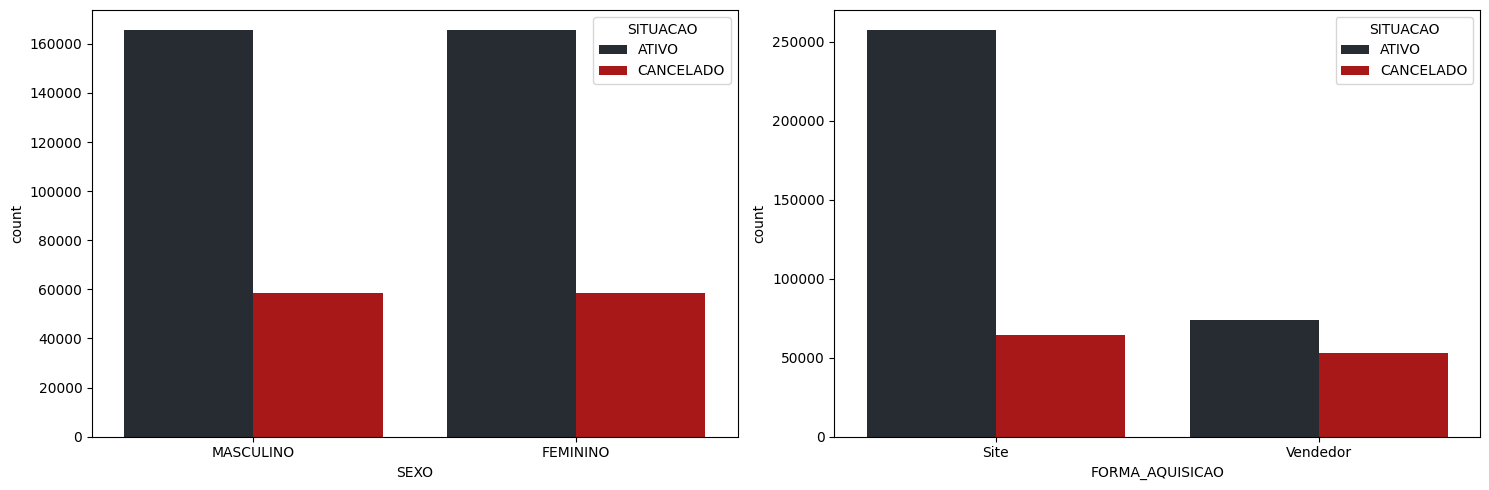

In [207]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.autolayout'] = True

f, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.countplot(data=df, x='SEXO', hue='SITUACAO', ax=axes[0], palette=["#252A34", "#C10000"])
sns.countplot(data=df, x='FORMA_AQUISICAO', hue='SITUACAO', ax=axes[1], palette=["#252A34", "#C10000"])


plt.show()

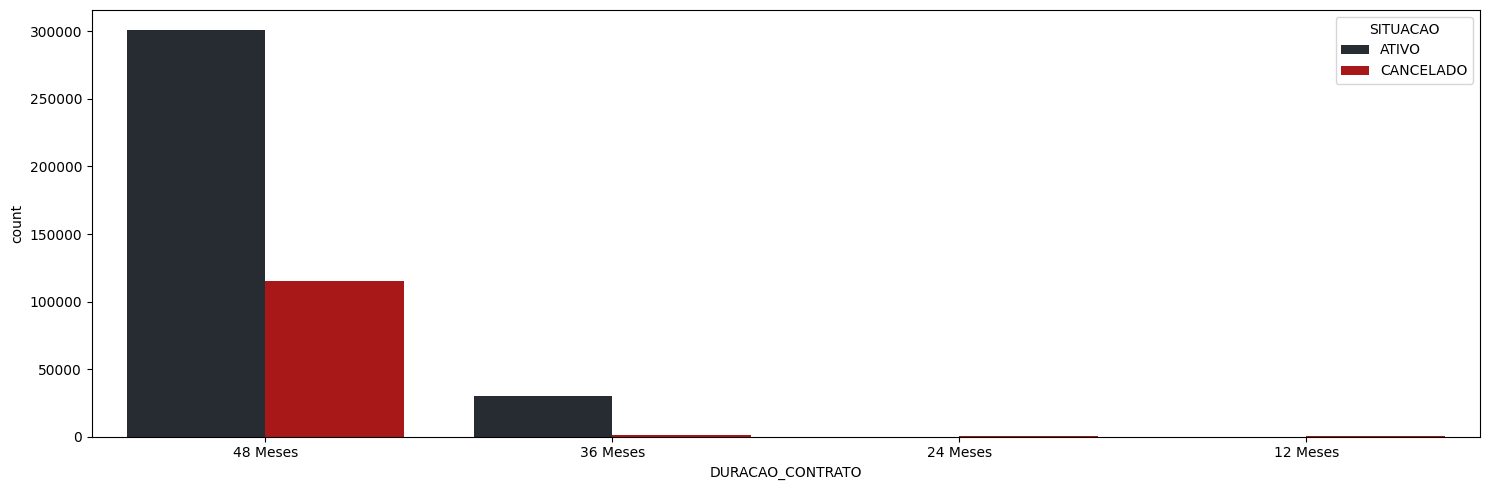

In [208]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.autolayout'] = True

sns.countplot(data=df, x='DURACAO_CONTRATO', hue='SITUACAO', palette=["#252A34", "#C10000"])
plt.show()

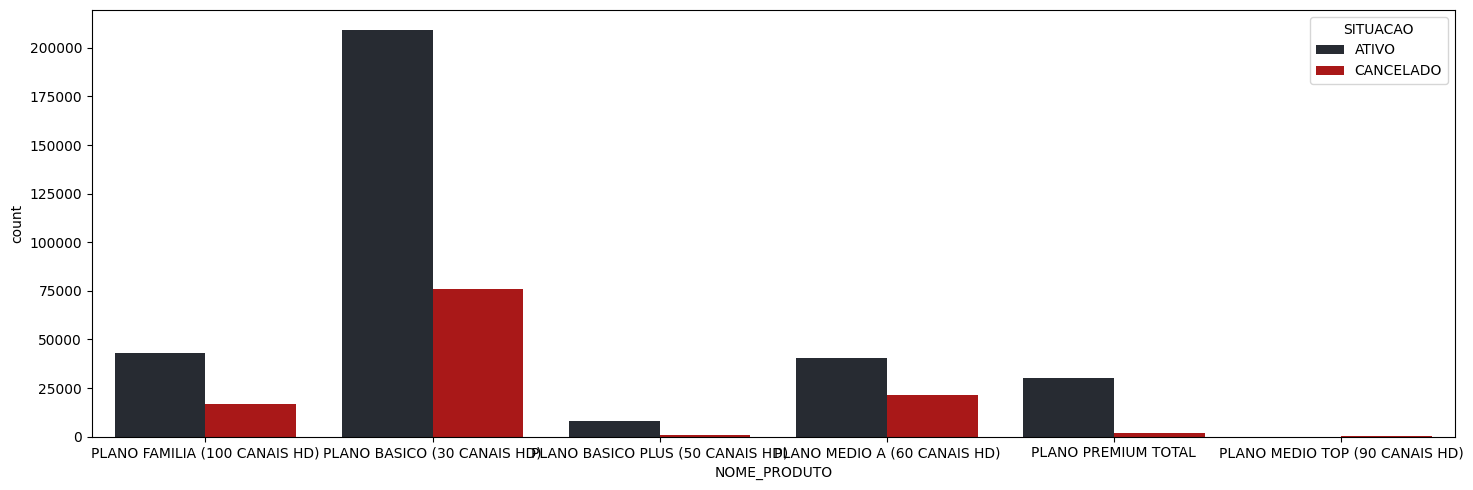

In [209]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.autolayout'] = True
sns.countplot(data=df, x='NOME_PRODUTO', hue='SITUACAO', palette=["#252A34", "#C10000"])
plt.show()

### Analisando as váriaveis númericas

In [210]:
variaveis_numericas = []

for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        variaveis_numericas.append(i)
print(variaveis_numericas)

['ID_CLIENTE', 'IDADE_CLIENTE', 'QT_FILHOS', 'DIAS_ATIVO', 'MESES_ATIVO', 'VL_PLANO_ADESAO', 'VL_PLANO_ATUAL', 'QT_PONTOS_INSTALADOS', 'QT_PC_PAGAS', 'QT_PC_VENCIDAS', 'QT_PC_PAGA_ATRASO', 'QT_PC_PAGA_EM_DIA', 'QT_ACORDO_PAGAMENTO', 'VL_MENSALIDADE_ATRASO', 'VL_MENSALIDADE_DT_AQUISICAO', 'VL_MENSALIDADE_DT_ATUAL', 'COD_SITUACAO']


In [211]:
len(variaveis_numericas)

17

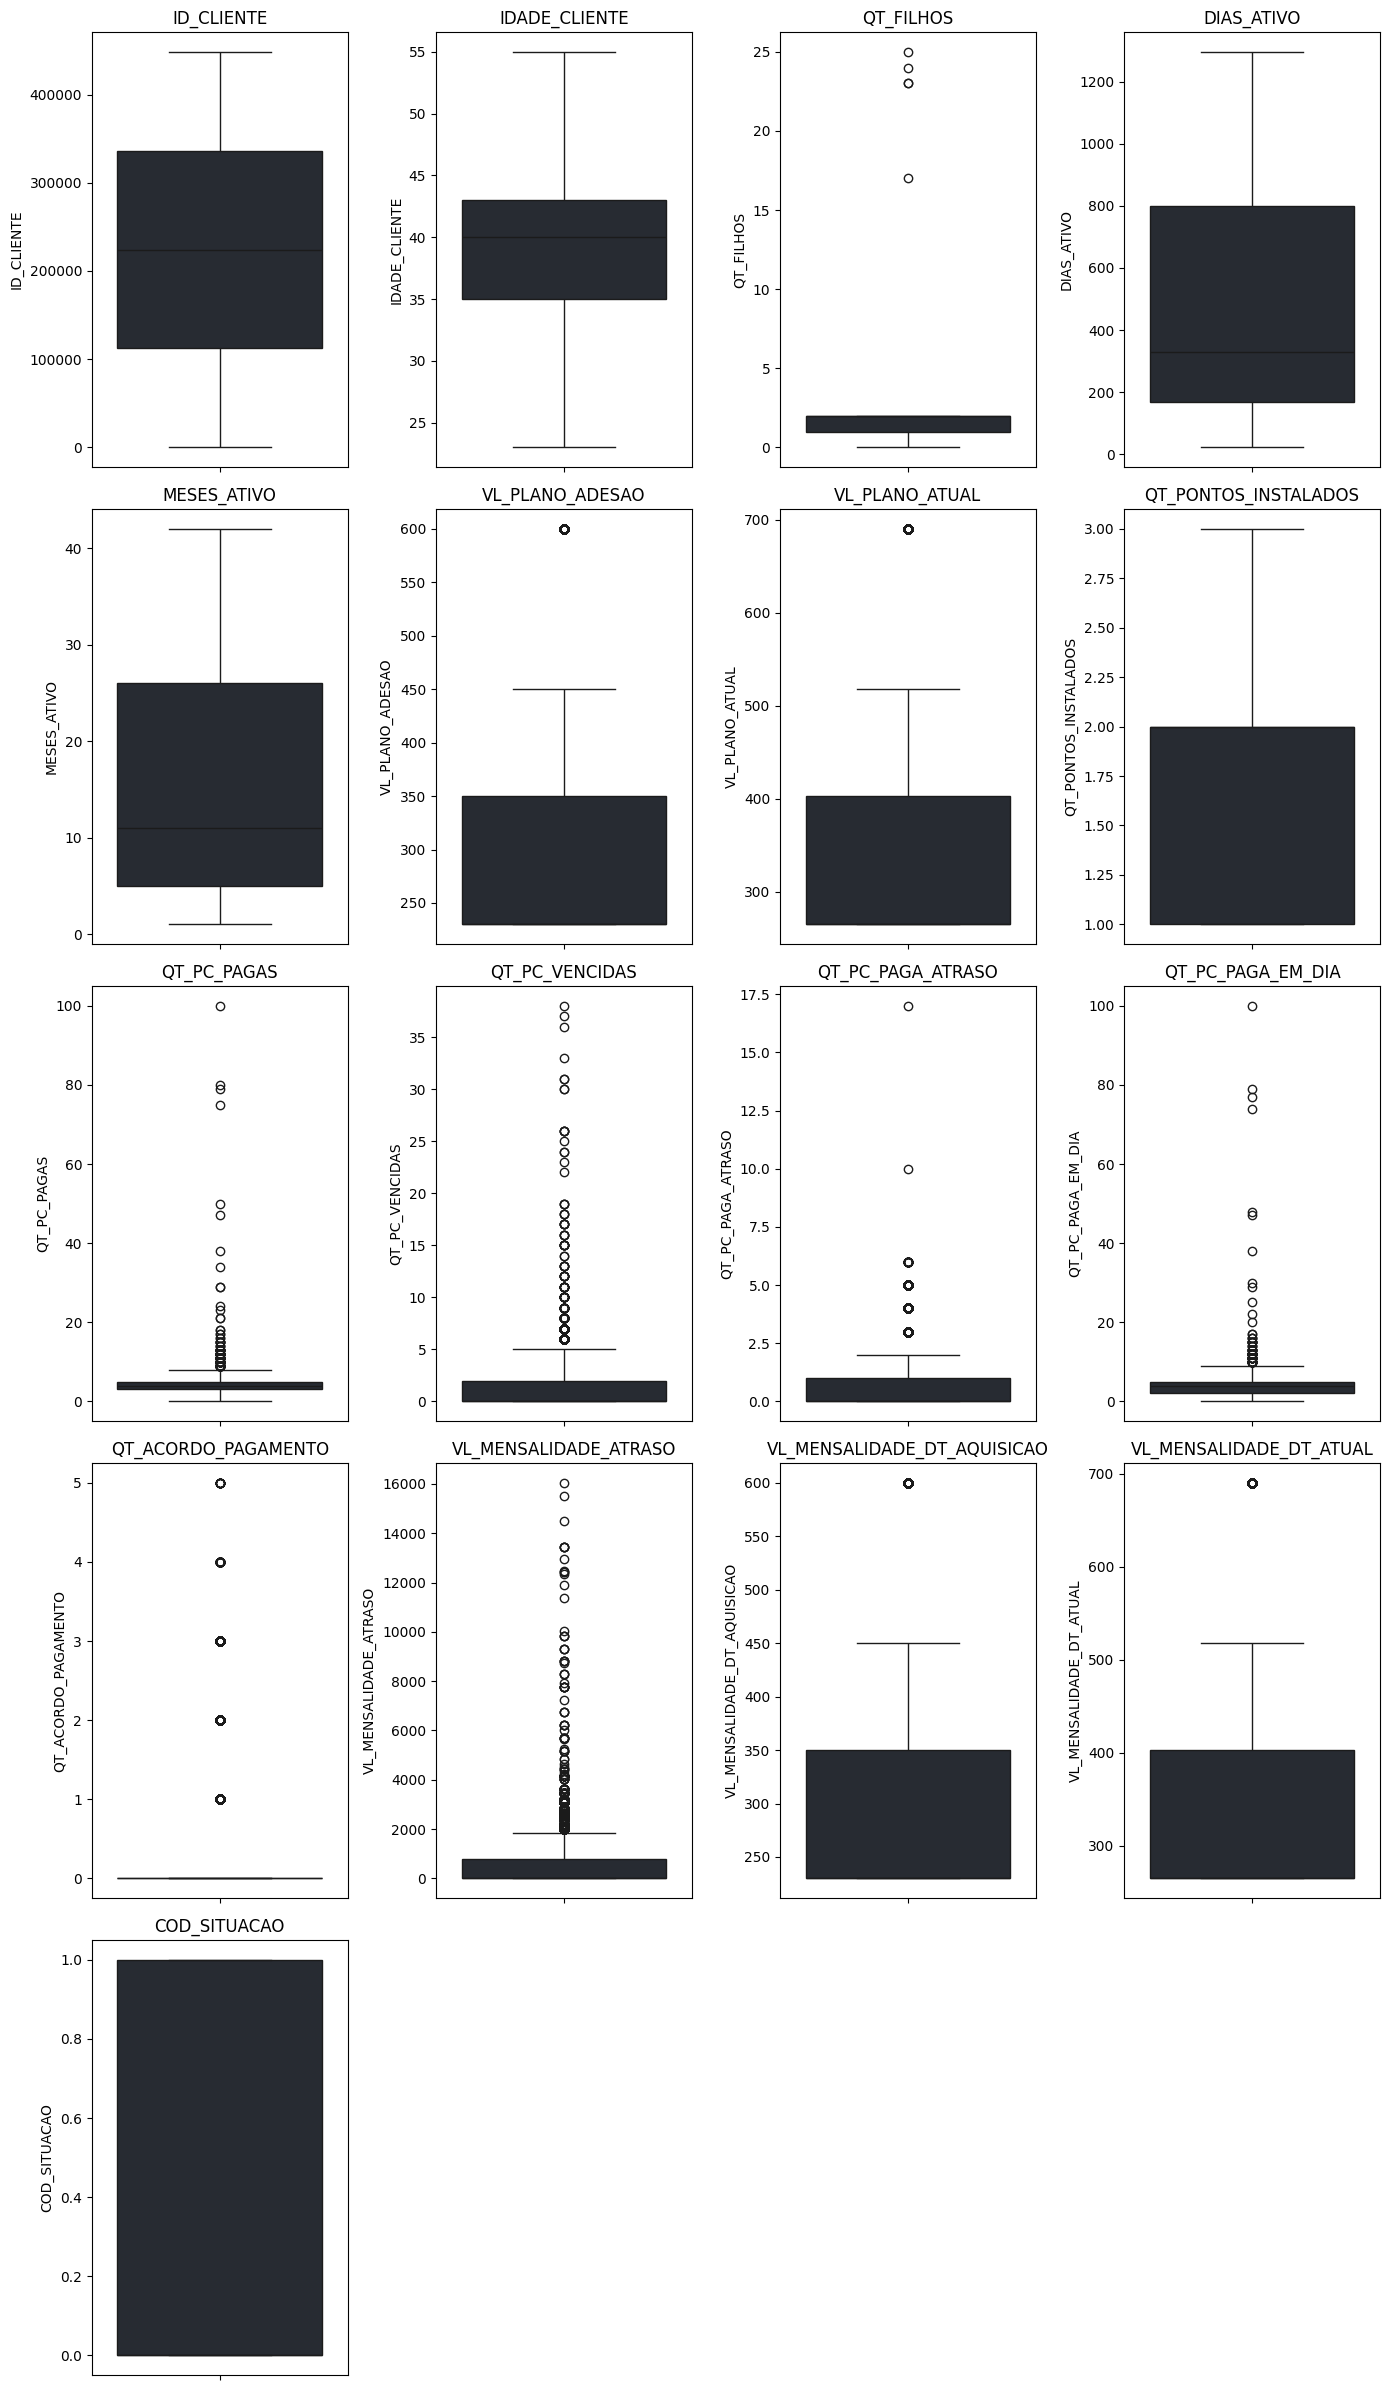

In [212]:
import math

# Configuração dos gráficos
plt.rcParams['figure.figsize'] = [14, 24]
plt.rcParams['figure.autolayout'] = True

# Número de gráficos
n = len(variaveis_numericas)
cols = 4
rows = math.ceil(n / cols)

# Criar os subplots
f, axes = plt.subplots(rows, cols)

# Deixa todos os eixos em uma lista única
axes = axes.flatten()

# Criar os boxplots
for idx, var in enumerate(variaveis_numericas):
    sns.boxplot(data=df, y=var, ax=axes[idx], palette=["#252A34", "#C10000"])
    axes[idx].set_title(var)

# Remover eixos vazios, se houver
for j in range(idx + 1, len(axes)):
    f.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [213]:
df.groupby(['QT_FILHOS']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,QT_FILHOS,counts
2,2.0,235825
1,1.0,212353
0,0.0,10
4,23.0,2
3,17.0,1
5,24.0,1
6,25.0,1


In [214]:
df.loc[df['QT_FILHOS'] > 2]

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
3,4,Vendedor,26,FEMININO,17.0,25/06/2019,NaN,757,25,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,1,4,0,0,230,265,ATIVO,0
91,92,Vendedor,48,FEMININO,23.0,03/08/2018,NaN,1083,35,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
164,165,Vendedor,55,MASCULINO,23.0,19/06/2018,NaN,1128,37,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,2,3,1,0,230,265,ATIVO,0
273,274,Vendedor,32,FEMININO,24.0,02/05/2018,NaN,1176,38,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),1,5,0,2,3,1,0,230,265,ATIVO,0
454,455,Vendedor,38,MASCULINO,25.0,04/09/2018,NaN,1051,34,48 Meses,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,1,0,230,265,ATIVO,0


### Tratamento de Dados

In [215]:
df_dados = df.loc[df['QT_FILHOS'] <= 2]
df_dados.shape

(448188, 24)

In [216]:
df_dados.groupby(['QT_FILHOS']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,QT_FILHOS,counts
2,2.0,235825
1,1.0,212353
0,0.0,10


In [217]:
print(f'Quantidade de média de filhos: {df_dados["QT_FILHOS"].mean()}')
print(f'A mediana é de : {df_dados["QT_FILHOS"].median()}')
print(f'A moda de filhos é de: {df_dados["QT_FILHOS"].mode()}')


Quantidade de média de filhos: 1.5261519719403465
A mediana é de : 2.0
A moda de filhos é de: 0    2.0
Name: QT_FILHOS, dtype: float64


In [218]:
df_dados['QT_FILHOS'] = df_dados['QT_FILHOS'].fillna(df_dados['QT_FILHOS'].median())
df_dados.isnull().sum()

ID_CLIENTE                          0
FORMA_AQUISICAO                     0
IDADE_CLIENTE                       0
SEXO                                0
QT_FILHOS                           0
DT_AQUISICAO                        0
DT_CANCELAMENTO                330987
DIAS_ATIVO                          0
MESES_ATIVO                         0
DURACAO_CONTRATO                    0
VL_PLANO_ADESAO                     0
VL_PLANO_ATUAL                      0
NOME_PRODUTO                        0
QT_PONTOS_INSTALADOS                0
QT_PC_PAGAS                         0
QT_PC_VENCIDAS                      0
QT_PC_PAGA_ATRASO                   0
QT_PC_PAGA_EM_DIA                   0
QT_ACORDO_PAGAMENTO                 0
VL_MENSALIDADE_ATRASO               0
VL_MENSALIDADE_DT_AQUISICAO         0
VL_MENSALIDADE_DT_ATUAL             0
SITUACAO                            0
COD_SITUACAO                        0
dtype: int64

In [219]:

df_dados['DURACAO_CONTRATO'] = df_dados['DURACAO_CONTRATO'].replace({
    '12 Meses': 12,
    '24 Meses': 24,
    '36 Meses': 36,
    '48 Meses': 48
})


In [220]:
df_dados.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0


In [221]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448188 entries, 0 to 448446
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID_CLIENTE                   448188 non-null  int64  
 1   FORMA_AQUISICAO              448188 non-null  object 
 2   IDADE_CLIENTE                448188 non-null  int64  
 3   SEXO                         448188 non-null  object 
 4   QT_FILHOS                    448188 non-null  float64
 5   DT_AQUISICAO                 448188 non-null  object 
 6   DT_CANCELAMENTO              117201 non-null  object 
 7   DIAS_ATIVO                   448188 non-null  int64  
 8   MESES_ATIVO                  448188 non-null  int64  
 9   DURACAO_CONTRATO             448188 non-null  int64  
 10  VL_PLANO_ADESAO              448188 non-null  int64  
 11  VL_PLANO_ATUAL               448188 non-null  int64  
 12  NOME_PRODUTO                 448188 non-null  object 
 13  QT_P

In [222]:
print(df_dados['QT_PC_PAGAS'].max())
print(df_dados['QT_PC_PAGA_EM_DIA'].max())

100
100


In [223]:
df_dados.loc[df_dados.QT_PC_PAGAS > df_dados.DURACAO_CONTRATO, 
             'QT_PC_PAGAS'] = df_dados.DURACAO_CONTRATO
df_dados.loc[df_dados.QT_PC_PAGA_EM_DIA > df_dados.DURACAO_CONTRATO, 'QT_PC_PAGA_EM_DIA'] = df_dados.DURACAO_CONTRATO


In [224]:
print(df_dados['QT_PC_PAGAS'].max())
print(df_dados['QT_PC_PAGA_EM_DIA'].max())

48
48


In [225]:
# Engenharia de atributos

bins = [-100, 3, 6, 12, 48]
labels = ['Baixa', 'Média', 'Alta', 'Muito Alta']
df_dados['NIVEL_PAGAMENTO'] = pd.cut(df_dados['QT_PC_PAGAS'], bins=bins, labels=labels)
pd.value_counts(df_dados.NIVEL_PAGAMENTO)

NIVEL_PAGAMENTO
Média         297750
Baixa         149912
Alta             488
Muito Alta        38
Name: count, dtype: int64

In [226]:
df_dados.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0,Baixa
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0,Média
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0,Média
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0,Média
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0,Média


In [227]:
# Copiando o dataframe para não perder os dados originais
df_dados_2 = df_dados.copy()
df_dados_2.head()

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,Site,23,MASCULINO,0.0,18/06/2021,NaN,33,1,48,450,518,PLANO FAMILIA (100 CANAIS HD),1,1,4,0,1,1,2070,450,518,ATIVO,0,Baixa
1,2,Vendedor,24,FEMININO,0.0,10/04/2018,NaN,1198,39,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,1,4,0,0,230,265,ATIVO,0,Média
2,3,Site,25,MASCULINO,0.0,09/10/2020,NaN,285,9,48,290,334,PLANO BASICO PLUS (50 CANAIS HD),3,5,0,3,2,0,0,290,334,ATIVO,0,Média
4,5,Vendedor,27,MASCULINO,0.0,19/09/2019,NaN,671,22,48,230,265,PLANO BASICO (30 CANAIS HD),2,5,0,5,0,0,0,230,265,ATIVO,0,Média
5,6,Vendedor,28,FEMININO,1.0,23/03/2018,NaN,1216,40,48,230,265,PLANO BASICO (30 CANAIS HD),3,5,0,0,5,0,0,230,265,ATIVO,0,Média


In [228]:
lb = LabelEncoder()

df_dados_2['SEXO'] = lb.fit_transform(df_dados_2['SEXO'])
df_dados_2['FORMA_AQUISICAO'] = lb.fit_transform(df_dados_2['FORMA_AQUISICAO'])
df_dados_2['NOME_PRODUTO'] = lb.fit_transform(df_dados_2['NOME_PRODUTO'])
df_dados_2['NIVEL_PAGAMENTO'] = lb.fit_transform(df_dados_2['NIVEL_PAGAMENTO'])

In [229]:
df_dados_2.head(20)

,ID_CLIENTE,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DT_AQUISICAO,DT_CANCELAMENTO,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,SITUACAO,COD_SITUACAO,NIVEL_PAGAMENTO
0,1,0,23,1,0.0,18/06/2021,NaN,33,1,48,450,518,2,1,1,4,0,1,1,2070,450,518,ATIVO,0,1
1,2,1,24,0,0.0,10/04/2018,NaN,1198,39,48,230,265,0,2,5,0,1,4,0,0,230,265,ATIVO,0,3
2,3,0,25,1,0.0,09/10/2020,NaN,285,9,48,290,334,1,3,5,0,3,2,0,0,290,334,ATIVO,0,3
4,5,1,27,1,0.0,19/09/2019,NaN,671,22,48,230,265,0,2,5,0,5,0,0,0,230,265,ATIVO,0,3
5,6,1,28,0,1.0,23/03/2018,NaN,1216,40,48,230,265,0,3,5,0,0,5,0,0,230,265,ATIVO,0,3
6,7,1,29,1,2.0,04/02/2019,NaN,898,29,48,350,403,3,1,1,0,0,1,0,0,350,403,ATIVO,0,1
7,8,0,30,0,1.0,11/11/2020,NaN,252,8,48,230,265,0,2,5,0,2,3,1,0,230,265,ATIVO,0,3
8,9,1,31,1,2.0,31/07/2018,NaN,1086,36,48,290,334,1,3,4,0,2,2,0,0,290,334,ATIVO,0,3
9,10,0,32,0,1.0,03/05/2021,NaN,79,2,48,230,265,0,1,2,3,1,1,1,794,230,265,ATIVO,0,1
10,11,0,33,1,2.0,16/06/2021,NaN,35,1,48,230,265,0,2,1,5,0,1,1,1323,230,265,ATIVO,0,1


In [230]:
df_dados_2.columns.tolist()

['ID_CLIENTE',
 'FORMA_AQUISICAO',
 'IDADE_CLIENTE',
 'SEXO',
 'QT_FILHOS',
 'DT_AQUISICAO',
 'DT_CANCELAMENTO',
 'DIAS_ATIVO',
 'MESES_ATIVO',
 'DURACAO_CONTRATO',
 'VL_PLANO_ADESAO',
 'VL_PLANO_ATUAL',
 'NOME_PRODUTO',
 'QT_PONTOS_INSTALADOS',
 'QT_PC_PAGAS',
 'QT_PC_VENCIDAS',
 'QT_PC_PAGA_ATRASO',
 'QT_PC_PAGA_EM_DIA',
 'QT_ACORDO_PAGAMENTO',
 'VL_MENSALIDADE_ATRASO',
 'VL_MENSALIDADE_DT_AQUISICAO',
 'VL_MENSALIDADE_DT_ATUAL',
 'SITUACAO',
 'COD_SITUACAO',
 'NIVEL_PAGAMENTO']

In [231]:
columns = [
    'FORMA_AQUISICAO',
    'IDADE_CLIENTE',
    'SEXO',
    'QT_FILHOS',
    'DIAS_ATIVO',
    'MESES_ATIVO',
    'DURACAO_CONTRATO',
    'VL_PLANO_ADESAO',
    'VL_PLANO_ATUAL',
    'NOME_PRODUTO',
    'QT_PONTOS_INSTALADOS',
    'QT_PC_PAGAS',
    'QT_PC_VENCIDAS',
    'QT_PC_PAGA_ATRASO',
    'QT_PC_PAGA_EM_DIA',
    'QT_ACORDO_PAGAMENTO',
    'VL_MENSALIDADE_ATRASO',
    'VL_MENSALIDADE_DT_AQUISICAO',
    'VL_MENSALIDADE_DT_ATUAL',
    'NIVEL_PAGAMENTO',   # <- Aqui estava o problema
    'COD_SITUACAO'
]

df_dados_2 = pd.DataFrame(df_dados_2, columns=columns)

In [232]:
df_dados_2.head(10)

,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,NIVEL_PAGAMENTO,COD_SITUACAO
0,0,23,1,0.0,33,1,48,450,518,2,1,1,4,0,1,1,2070,450,518,1,0
1,1,24,0,0.0,1198,39,48,230,265,0,2,5,0,1,4,0,0,230,265,3,0
2,0,25,1,0.0,285,9,48,290,334,1,3,5,0,3,2,0,0,290,334,3,0
4,1,27,1,0.0,671,22,48,230,265,0,2,5,0,5,0,0,0,230,265,3,0
5,1,28,0,1.0,1216,40,48,230,265,0,3,5,0,0,5,0,0,230,265,3,0
6,1,29,1,2.0,898,29,48,350,403,3,1,1,0,0,1,0,0,350,403,1,0
7,0,30,0,1.0,252,8,48,230,265,0,2,5,0,2,3,1,0,230,265,3,0
8,1,31,1,2.0,1086,36,48,290,334,1,3,4,0,2,2,0,0,290,334,3,0
9,0,32,0,1.0,79,2,48,230,265,0,1,2,3,1,1,1,794,230,265,1,0
10,0,33,1,2.0,35,1,48,230,265,0,2,1,5,0,1,1,1323,230,265,1,0


In [233]:
df_dados_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 448188 entries, 0 to 448446
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   FORMA_AQUISICAO              448188 non-null  int64  
 1   IDADE_CLIENTE                448188 non-null  int64  
 2   SEXO                         448188 non-null  int64  
 3   QT_FILHOS                    448188 non-null  float64
 4   DIAS_ATIVO                   448188 non-null  int64  
 5   MESES_ATIVO                  448188 non-null  int64  
 6   DURACAO_CONTRATO             448188 non-null  int64  
 7   VL_PLANO_ADESAO              448188 non-null  int64  
 8   VL_PLANO_ATUAL               448188 non-null  int64  
 9   NOME_PRODUTO                 448188 non-null  int64  
 10  QT_PONTOS_INSTALADOS         448188 non-null  int64  
 11  QT_PC_PAGAS                  448188 non-null  int64  
 12  QT_PC_VENCIDAS               448188 non-null  int64  
 13  QT_P

<Axes: xlabel='COD_SITUACAO'>

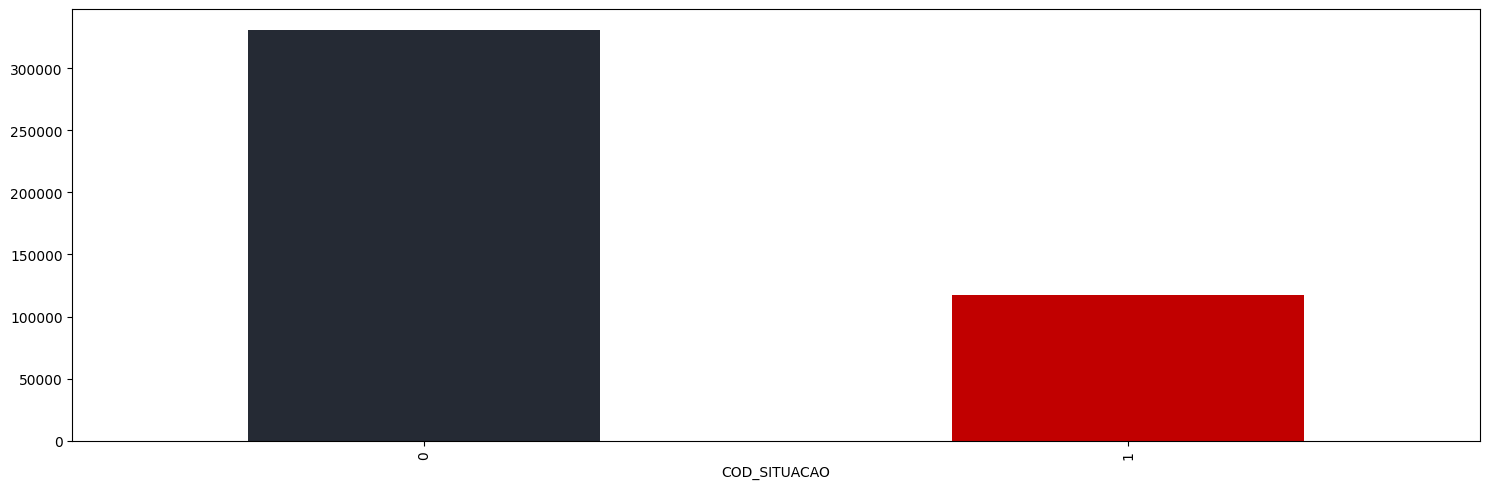

In [234]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.autolayout'] = True
df_dados_2['COD_SITUACAO'].value_counts().plot(kind='bar', color=["#252A34", "#C10000"])

In [235]:
preditores = df_dados_2.iloc[:, 0:20]
target = df_dados_2.iloc[:, 20]
preditores.head(10)

,FORMA_AQUISICAO,IDADE_CLIENTE,SEXO,QT_FILHOS,DIAS_ATIVO,MESES_ATIVO,DURACAO_CONTRATO,VL_PLANO_ADESAO,VL_PLANO_ATUAL,NOME_PRODUTO,QT_PONTOS_INSTALADOS,QT_PC_PAGAS,QT_PC_VENCIDAS,QT_PC_PAGA_ATRASO,QT_PC_PAGA_EM_DIA,QT_ACORDO_PAGAMENTO,VL_MENSALIDADE_ATRASO,VL_MENSALIDADE_DT_AQUISICAO,VL_MENSALIDADE_DT_ATUAL,NIVEL_PAGAMENTO
0,0,23,1,0.0,33,1,48,450,518,2,1,1,4,0,1,1,2070,450,518,1
1,1,24,0,0.0,1198,39,48,230,265,0,2,5,0,1,4,0,0,230,265,3
2,0,25,1,0.0,285,9,48,290,334,1,3,5,0,3,2,0,0,290,334,3
4,1,27,1,0.0,671,22,48,230,265,0,2,5,0,5,0,0,0,230,265,3
5,1,28,0,1.0,1216,40,48,230,265,0,3,5,0,0,5,0,0,230,265,3
6,1,29,1,2.0,898,29,48,350,403,3,1,1,0,0,1,0,0,350,403,1
7,0,30,0,1.0,252,8,48,230,265,0,2,5,0,2,3,1,0,230,265,3
8,1,31,1,2.0,1086,36,48,290,334,1,3,4,0,2,2,0,0,290,334,3
9,0,32,0,1.0,79,2,48,230,265,0,1,2,3,1,1,1,794,230,265,1
10,0,33,1,2.0,35,1,48,230,265,0,2,1,5,0,1,1,1323,230,265,1


In [236]:
target.head(10)

0     0
1     0
2     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
Name: COD_SITUACAO, dtype: int64

In [237]:
#Seed para reprodutibilidade
seed = 100

balanceador = SMOTE(random_state=seed)

preditores_res, target_res = balanceador.fit_resample(preditores, target)


Text(0.5, 1.0, 'Distribuição de classes após o balanceamento')

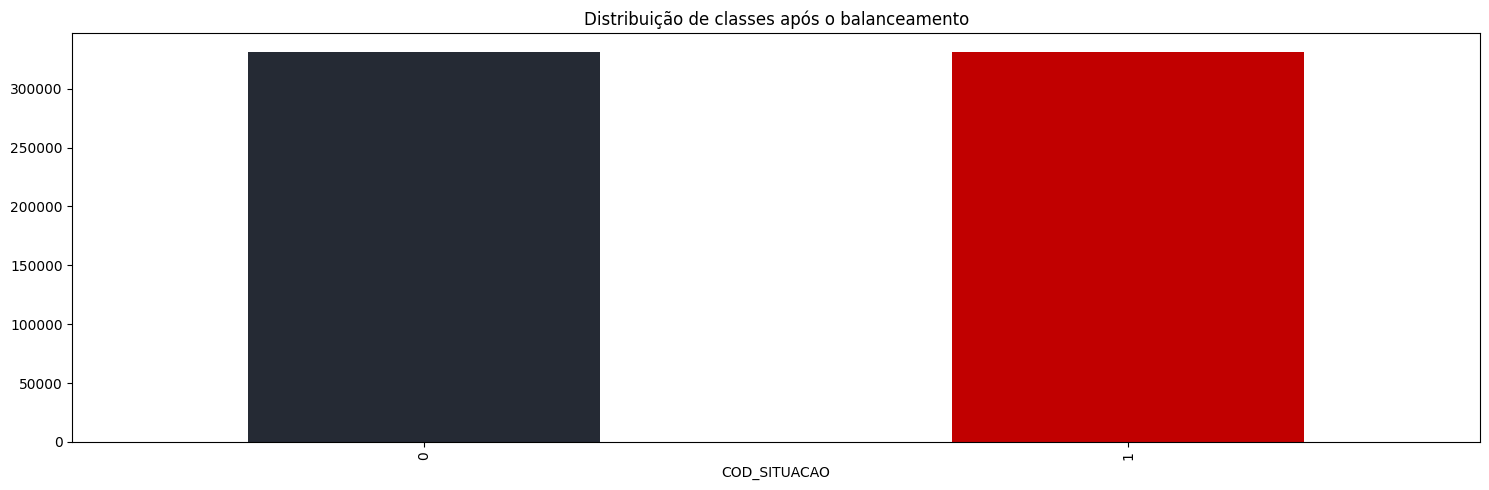

In [238]:
plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.autolayout'] = True
target_res.value_counts().plot(kind='bar', color=["#252A34", "#C10000"])
plt.title('Distribuição de classes após o balanceamento')

In [239]:
preditores.shape

(448188, 20)

In [240]:
target.shape

(448188,)

In [241]:
preditores_res.shape

(661974, 20)

In [242]:
target_res.shape

(661974,)

In [243]:
# Divisão em treino e teste

X_train, X_test, y_train, y_test = train_test_split(preditores_res, target_res, test_size=0.3, random_state=42)

In [244]:
padronizador = StandardScaler()
x_treino_padronizado = padronizador.fit_transform(X_train)
x_teste_padronizado = padronizador.transform(X_test)

In [245]:
x_treino_padronizado

array([[-0.69344221,  0.53255998,  1.06021306, ...,  1.41114896,
         1.41223978,  0.95036646],
       [ 1.44208125, -0.02658459, -0.94320665, ...,  1.41114896,
         1.41223978, -1.05076393],
       [-0.69344221, -0.02658459, -0.94320665, ...,  2.81634037,
         2.81422044,  0.95036646],
       ...,
       [-0.69344221, -1.56423215, -0.94320665, ..., -0.64979845,
        -0.64997596,  0.95036646],
       [ 1.44208125,  0.53255998, -0.94320665, ...,  0.47435468,
         0.47486899, -1.05076393],
       [ 1.44208125,  0.53255998, -0.94320665, ...,  1.41114896,
         1.41223978,  0.95036646]], shape=(463381, 20))

In [246]:
# range de valores para k
kVals = range(3, 10, 2)

In [247]:
acuracias = []

In [248]:
start = time.time()

for k in kVals:
    
    # Treinado o modelo KNN com o valor de k
    
    modeloKNN = KNeighborsClassifier(n_neighbors=k)
    modeloKNN.fit(x_treino_padronizado, y_train)
    
    # Avaliando o modelo e atualizando a acurácia
    score = modeloKNN.score(x_teste_padronizado, y_test)
    print(f'Acurácia para k={k}: {score}')
    acuracias.append(score)
    
end = time.time()
print(f'Tempo de execução: {end - start} segundos')

Acurácia para k=3: 0.9768320132129531
Acurácia para k=5: 0.973785581566319
Acurácia para k=7: 0.9719879351235945
Acurácia para k=9: 0.97033631598294
Tempo de execução: 286.3130187988281 segundos


In [249]:
# Obtendo o valor de k com a maior acurácia

i = np.argmax(acuracias)
print(f'Valor de k com maior acurácia: {kVals[i]}')

Valor de k com maior acurácia: 3


In [250]:
modeloFinal = KNeighborsClassifier(n_neighbors=kVals[i])

In [251]:
# Treinando o modelo
modeloFinal.fit(x_treino_padronizado, y_train)

KNeighborsClassifier(n_neighbors=3)

In [252]:
previsoes = modeloFinal.predict(x_teste_padronizado)

In [253]:
print(f'Acurácia do modelo: {accuracy_score(y_test, previsoes)}')

Acurácia do modelo: 0.9768320132129531


### Testando o modelo

In [254]:
print(df_dados_2.columns.tolist())


['FORMA_AQUISICAO', 'IDADE_CLIENTE', 'SEXO', 'QT_FILHOS', 'DIAS_ATIVO', 'MESES_ATIVO', 'DURACAO_CONTRATO', 'VL_PLANO_ADESAO', 'VL_PLANO_ATUAL', 'NOME_PRODUTO', 'QT_PONTOS_INSTALADOS', 'QT_PC_PAGAS', 'QT_PC_VENCIDAS', 'QT_PC_PAGA_ATRASO', 'QT_PC_PAGA_EM_DIA', 'QT_ACORDO_PAGAMENTO', 'VL_MENSALIDADE_ATRASO', 'VL_MENSALIDADE_DT_AQUISICAO', 'VL_MENSALIDADE_DT_ATUAL', 'NIVEL_PAGAMENTO', 'COD_SITUACAO']


In [255]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df_dados_2['CANCELAMENTO'] = df_dados_2['COD_SITUACAO'].apply(lambda x: 1 if x == 1 else 0)


X = df_dados_2.drop(['COD_SITUACAO', 'CANCELAMENTO'], axis=1)
y = df_dados_2['CANCELAMENTO']

# 4. Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Treinar o modelo
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)

# 6. Fazer previsões
y_pred = modelo.predict(X_test)

# 7. Avaliar o modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))



Acurácia: 0.9924808674892345

Matriz de Confusão:
[[98859   515]
 [  496 34587]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     99374
           1       0.99      0.99      0.99     35083

    accuracy                           0.99    134457
   macro avg       0.99      0.99      0.99    134457
weighted avg       0.99      0.99      0.99    134457



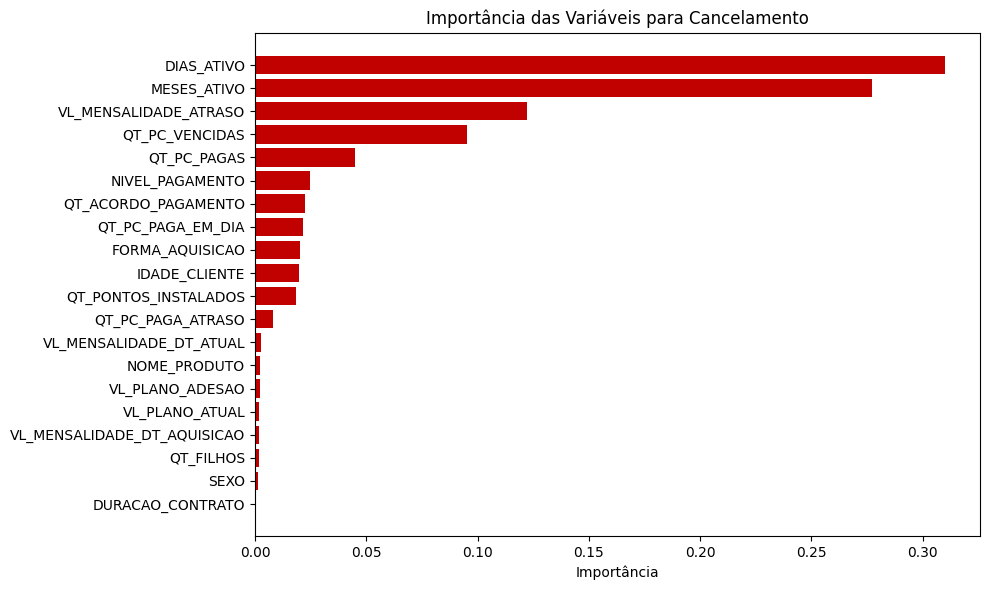

In [256]:
importancias = modelo.feature_importances_
colunas = X.columns

df_importancias = pd.DataFrame({'Variável': colunas, 'Importância': importancias})
df_importancias = df_importancias.sort_values(by='Importância', ascending=False)

plt.figure(figsize=(10, 6))  # Aqui não vai color
plt.barh(df_importancias['Variável'], df_importancias['Importância'], color="#C10000")  # Aqui sim
plt.gca().invert_yaxis()
plt.title('Importância das Variáveis para Cancelamento')
plt.xlabel('Importância')
plt.tight_layout()
plt.show()


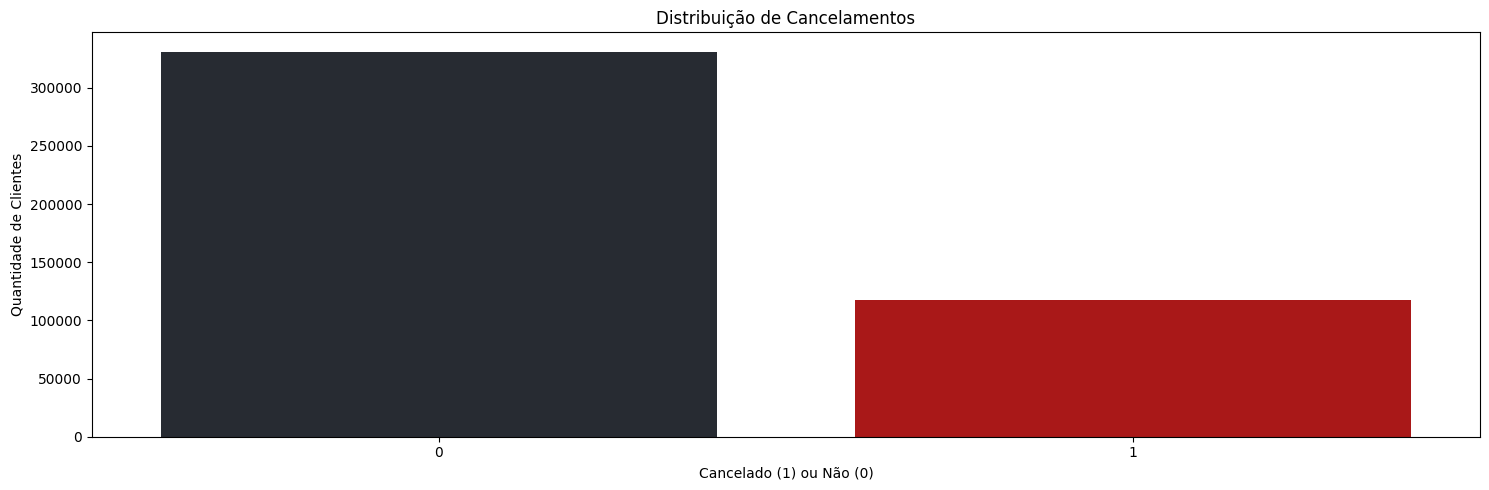

In [257]:
sns.countplot(x='CANCELAMENTO', data=df_dados_2, palette=["#252A34", "#C10000"])
plt.title('Distribuição de Cancelamentos')
plt.xlabel('Cancelado (1) ou Não (0)')
plt.ylabel('Quantidade de Clientes')
plt.show()

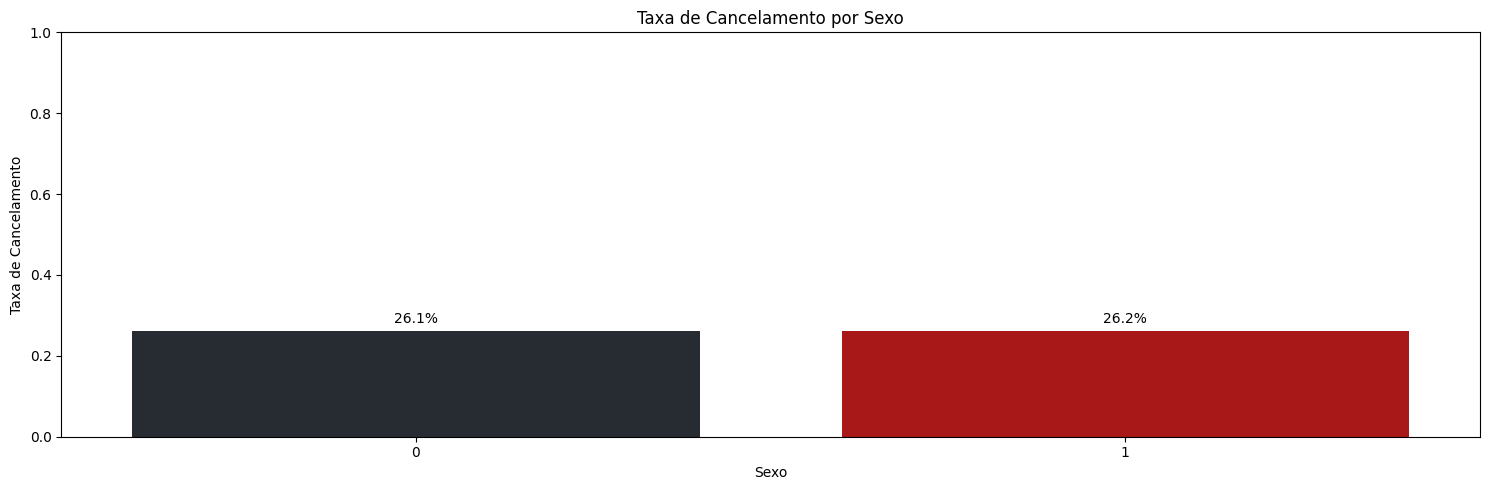

In [258]:
taxa_cancelamento = df_dados_2.groupby('SEXO')['CANCELAMENTO'].mean().reset_index()

sns.barplot(x='SEXO', y='CANCELAMENTO', data=taxa_cancelamento, palette=["#252A34", "#C10000"])
plt.title('Taxa de Cancelamento por Sexo')
plt.ylabel('Taxa de Cancelamento')
plt.xlabel('Sexo')
plt.ylim(0, 1)

# Adicionando rótulos com percentual
for index, row in taxa_cancelamento.iterrows():
    plt.text(row.name, row.CANCELAMENTO + 0.02, f"{row.CANCELAMENTO:.1%}", ha='center')

plt.show()


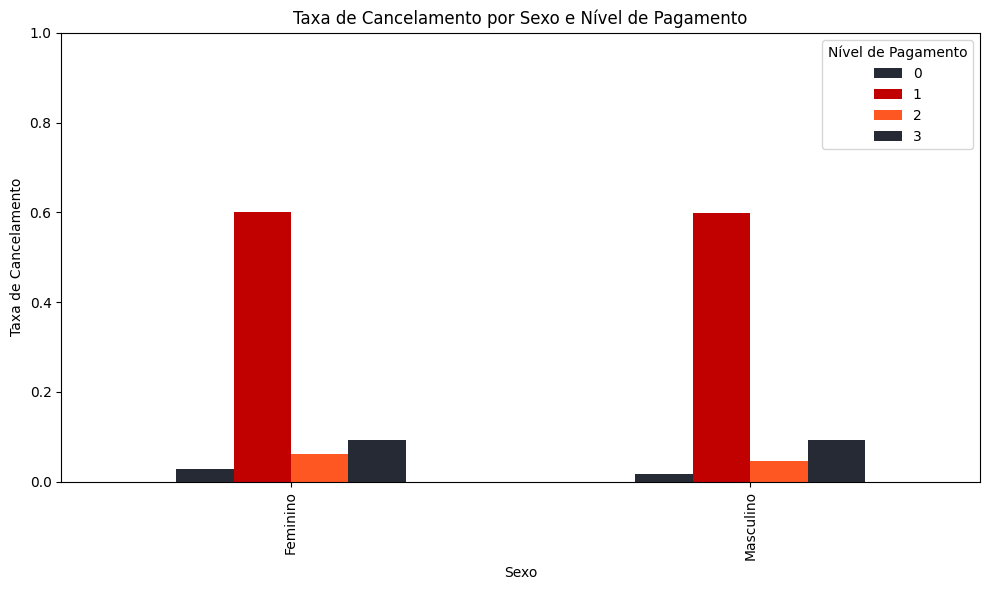

In [259]:
ax = df_dados_2.groupby(['SEXO', 'NIVEL_PAGAMENTO'])['CANCELAMENTO'].mean().unstack().plot(
    kind='bar',
    figsize=(10, 6),
    color=['#252A34', '#C10000', '#FF5722']
)

# Renomeia os valores do eixo X com rótulos
ax.set_xticklabels(['Feminino', 'Masculino'])  # ajuste conforme seus valores

plt.title('Taxa de Cancelamento por Sexo e Nível de Pagamento')
plt.ylabel('Taxa de Cancelamento')
plt.xlabel('Sexo')
plt.ylim(0, 1)
plt.legend(title='Nível de Pagamento')
plt.tight_layout()
plt.show()


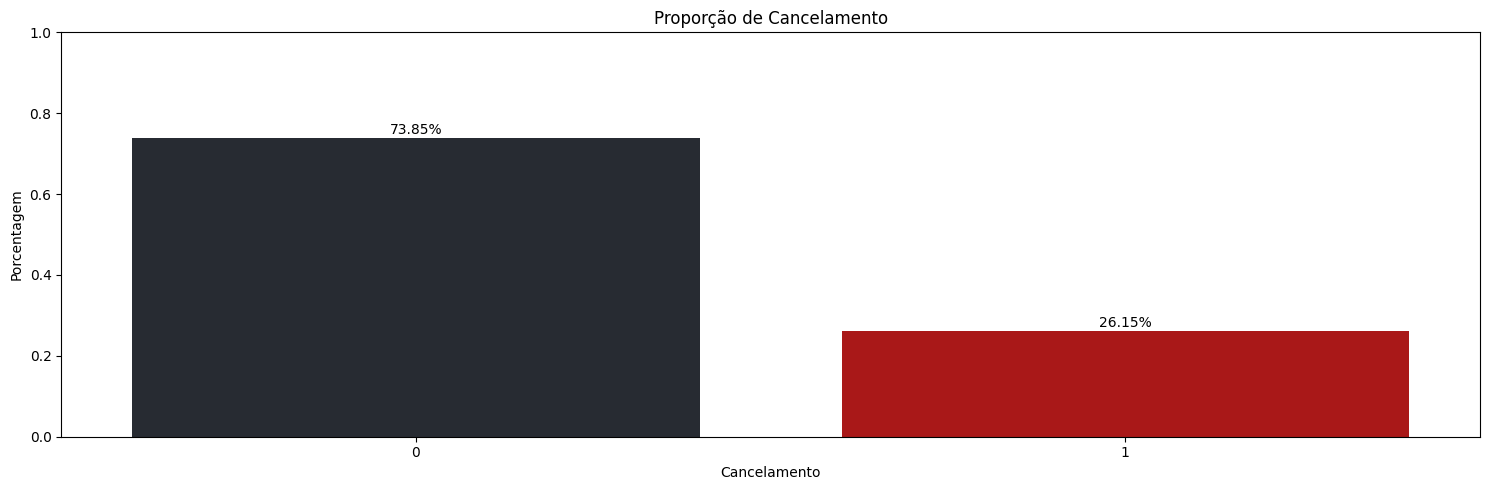

In [ ]:
# Gráfico de barras para a proporção de cancelamento
cancelamento_porcentagem = df_dados_2['CANCELAMENTO'].value_counts(normalize=True).reset_index()
cancelamento_porcentagem.columns = ['CANCELAMENTO', 'Proporcao']

sns.barplot(x='CANCELAMENTO', y='Proporcao', data=cancelamento_porcentagem, palette=["#252A34", "#C10000"])
plt.title('Proporção de Cancelamento')
plt.ylabel('Porcentagem')
plt.xlabel('Cancelamento')

# Adiciona os valores em cima das barras
for i, row in cancelamento_porcentagem.iterrows():
    plt.text(i, row['Proporcao'] + 0.01, f"{row['Proporcao']:.2%}", ha='center')

plt.ylim(0, 1)
plt.show()
